<a href="https://colab.research.google.com/github/chanHui-lab/Cancer-Data-Analysis/blob/main/Cancer_Health_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.0 Connect to Google Drive and Import Relevant Library**

In [ ]:
# Connect to Google Drive to read csv file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Necessary libraries
import numpy as np
import pandas as pd
import itertools

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import datasets
%matplotlib inline

# Scaling the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Splitting the data
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Model Stacking
from sklearn.ensemble import StackingClassifier

# For Hyper-parameter Tuning the model
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# For checking Model Performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error


## **2.0 Data Visualisation**


570 cancer cells and 30 features to determine whether the cancer cells in our data are benign or malignant

The cancer data contains 2 types of cancers: 1. benign cancer (B) and 2. malignant cancer (M).

1. There are 569 rows of data and 33 columns in the dataset
2. There are no null values in the first 32 columns, but the data in last column 'Unnamed: 32' all are null value. So, this column will be dropped.
3. 63% of the data have 'Banign' output, 37% of the data have 'Maglignant' output. Hence, the data is unbalanced. This is a case that tends to provide misleading classification accuracy.

### **2.1 Understand the Dataset**

In [ ]:
# Step 1: Reading data from csv file

# Load csv file
# Save your csv file in Google Drive, and name it as Cancer_Data.csv
cancer = pd.read_csv('Cancer_Data.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Set the output rows and columns results
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
#Checking for null values
null = cancer.isnull().sum()
null

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

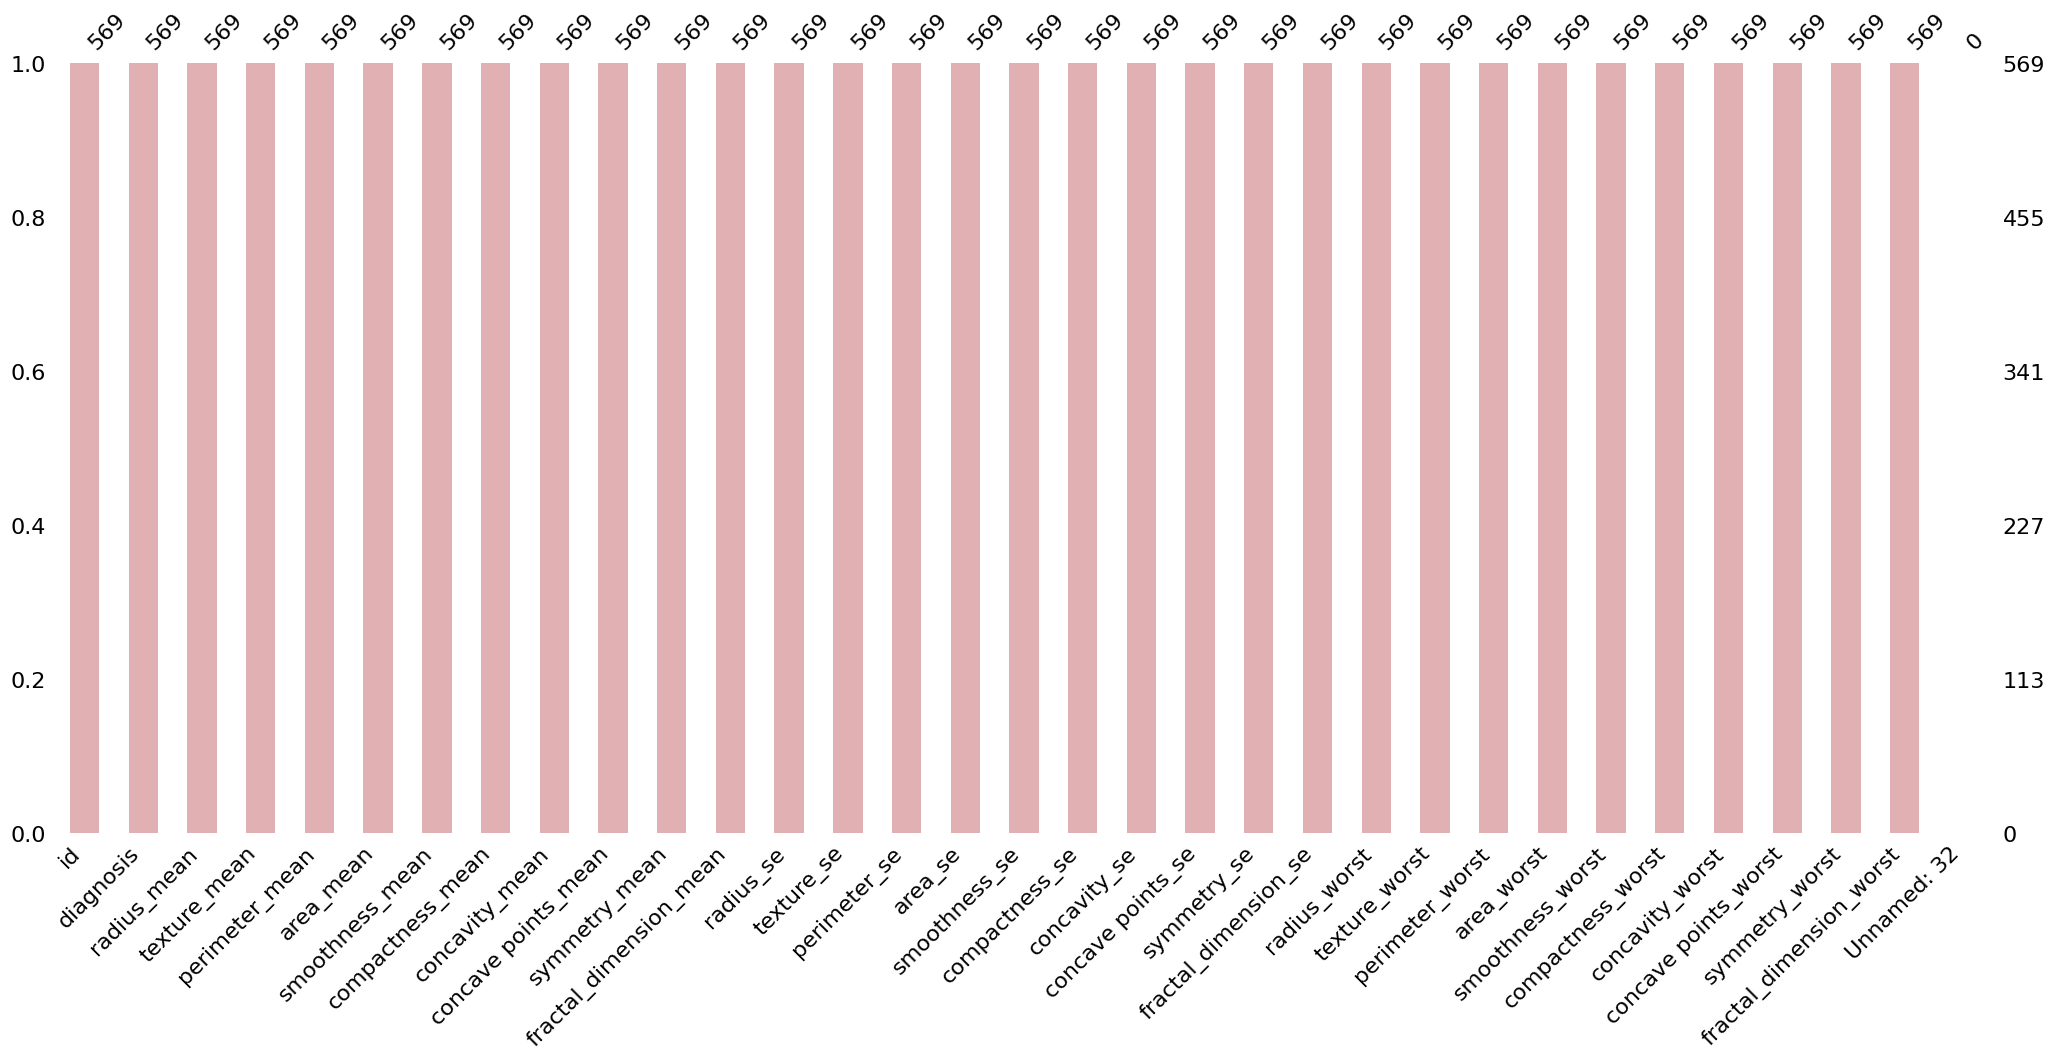

In [ ]:
# show null count analysis
null_plot = msno.bar(cancer, color="#e0b0b3")

In [ ]:
# Analysing the target column
print(cancer['diagnosis'].unique())
print(cancer["diagnosis"].value_counts())

['M' 'B']
B    357
M    212
Name: diagnosis, dtype: int64


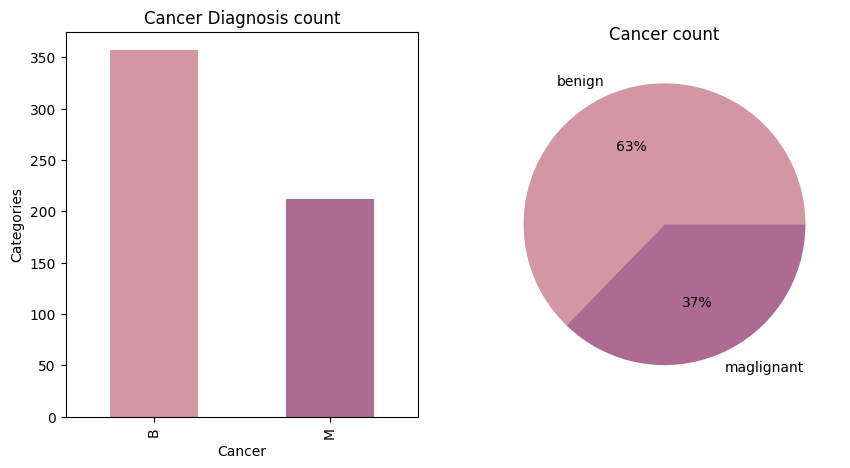

In [ ]:
# Data visualizations for frequency of diagnosis
# 'diagnosis' Tagged as B (Benign) and M (Maglignant)

colors = ["#d396a5", "#ae6b91"]

# Bar chart
plt.subplot(121)
vis_diagnosis = cancer.diagnosis.value_counts().plot(figsize=(10, 5), kind="bar", color=colors)
plt.title("Cancer Diagnosis count")
plt.xlabel("Cancer")
plt.ylabel("Categories")

# Pie chart
benign = 357
maglignant = 212

plt.subplot(122)
vix_pie_diagnosis = plt.pie([benign, maglignant], labels=["benign", "maglignant"],
                               colors=colors, autopct="%1.0f%%")
plt.title("Cancer count")

plt.show()


# The count plot of targets indicates an imbalance in data. This is a case that tends to provide misleading classification accuracy

In [ ]:
cancer.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype=object)

### **2.2 Correlation**

The correlation between numeric features and output variable 'diagnosis' is considered as strong positive.

In [ ]:
# Replacing 'B' (benign) and 'M' (malignant) with 0 and 1

cancer['diagnosis'].replace(['B', 'M'],
                        [0, 1], inplace=True)

#### 2.2.1 Between Estimated Features

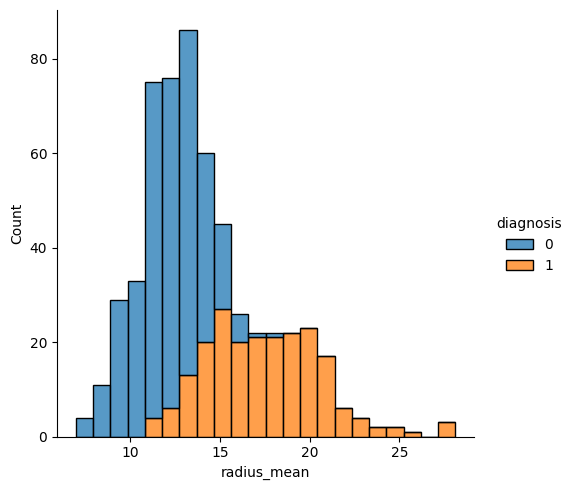

In [ ]:
# Between radius_mean and diagnosis
sns.displot(data=cancer, x="radius_mean", hue="diagnosis", multiple="stack")

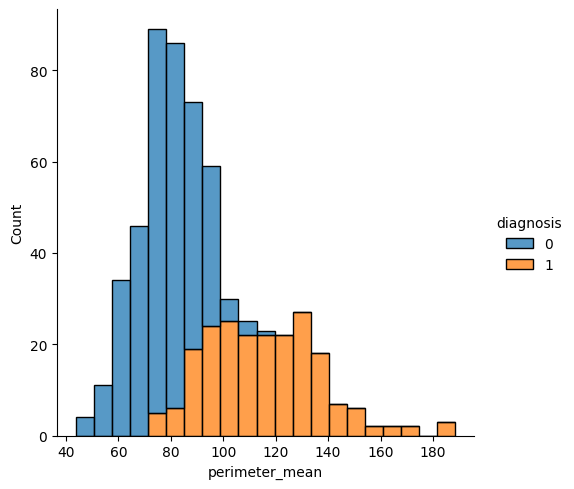

In [ ]:
# Between perimeter_mean and diagnosis
sns.displot(data=cancer, x="perimeter_mean", hue="diagnosis", multiple="stack")

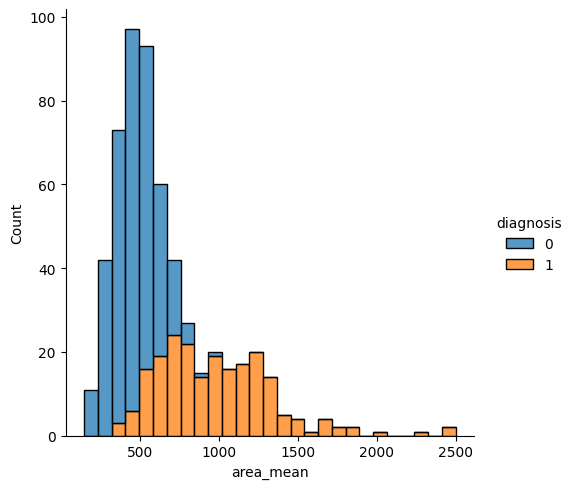

In [ ]:
# Between area_mean and diagnosis
sns.displot(data=cancer, x="area_mean", hue="diagnosis", multiple="stack")

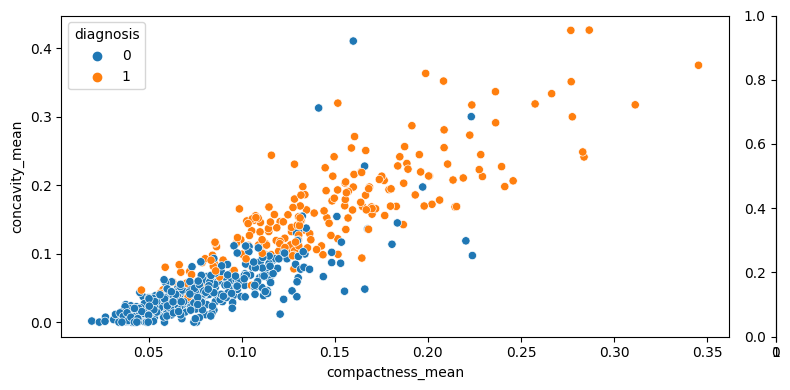

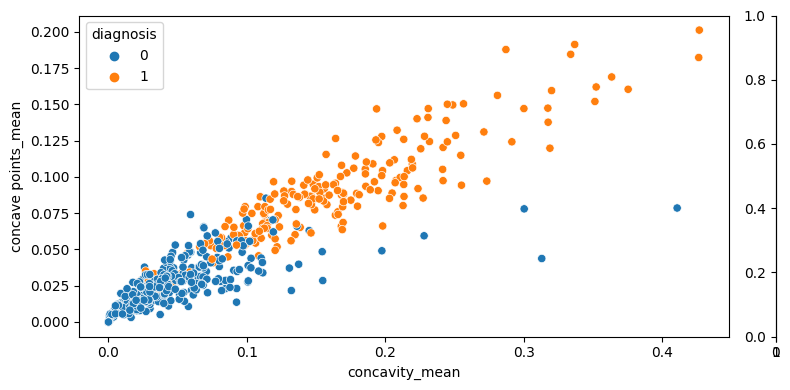

In [ ]:
# Between compactness_mean and concavity_mean
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 0]))
sns.scatterplot(data=cancer, x="compactness_mean", y="concavity_mean", hue="diagnosis", ax=axs[0])
f.tight_layout()

#Between concavity_mean and concave points_mean
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 0]))
sns.scatterplot(data=cancer, x="concavity_mean", y="concave points_mean", hue="diagnosis", ax=axs[0])
f.tight_layout()

#### 2.2.2 Between All Features

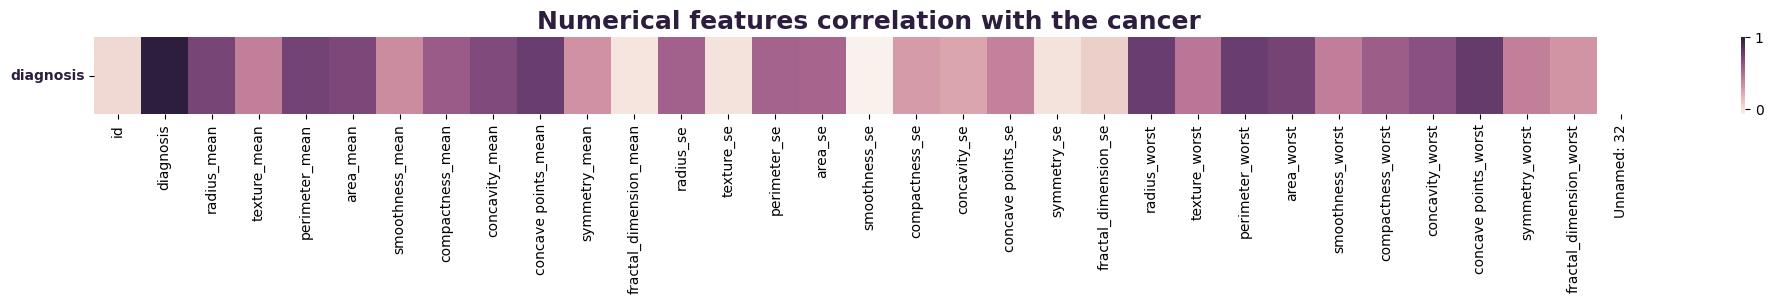

In [ ]:
# Checking correlation of numeric features with output variable "diagnosis"

numeric_data = cancer.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()

f, ax = plt.subplots(figsize=(25,1))

cmap = sns.cubehelix_palette(light=.95, as_cmap=True)

sns.heatmap(numeric_corr.sort_values(by=["diagnosis"], ascending=False).head(1), cmap=cmap)

plt.title("Numerical features correlation with the cancer", weight="bold", fontsize=18, color="#2d1e3e")
plt.yticks(weight="bold", color="#2d1e3e", rotation=0, label="Fetal health")

plt.show()

In [ ]:
# Checking correlation of numeric features with output variable “Fetal health” with values

num_feature = numeric_corr["diagnosis"].sort_values(ascending=False).head(20).to_frame()
cancer_health_corr_table = num_feature.style.background_gradient(cmap=cmap)

cancer_health_corr_table

,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


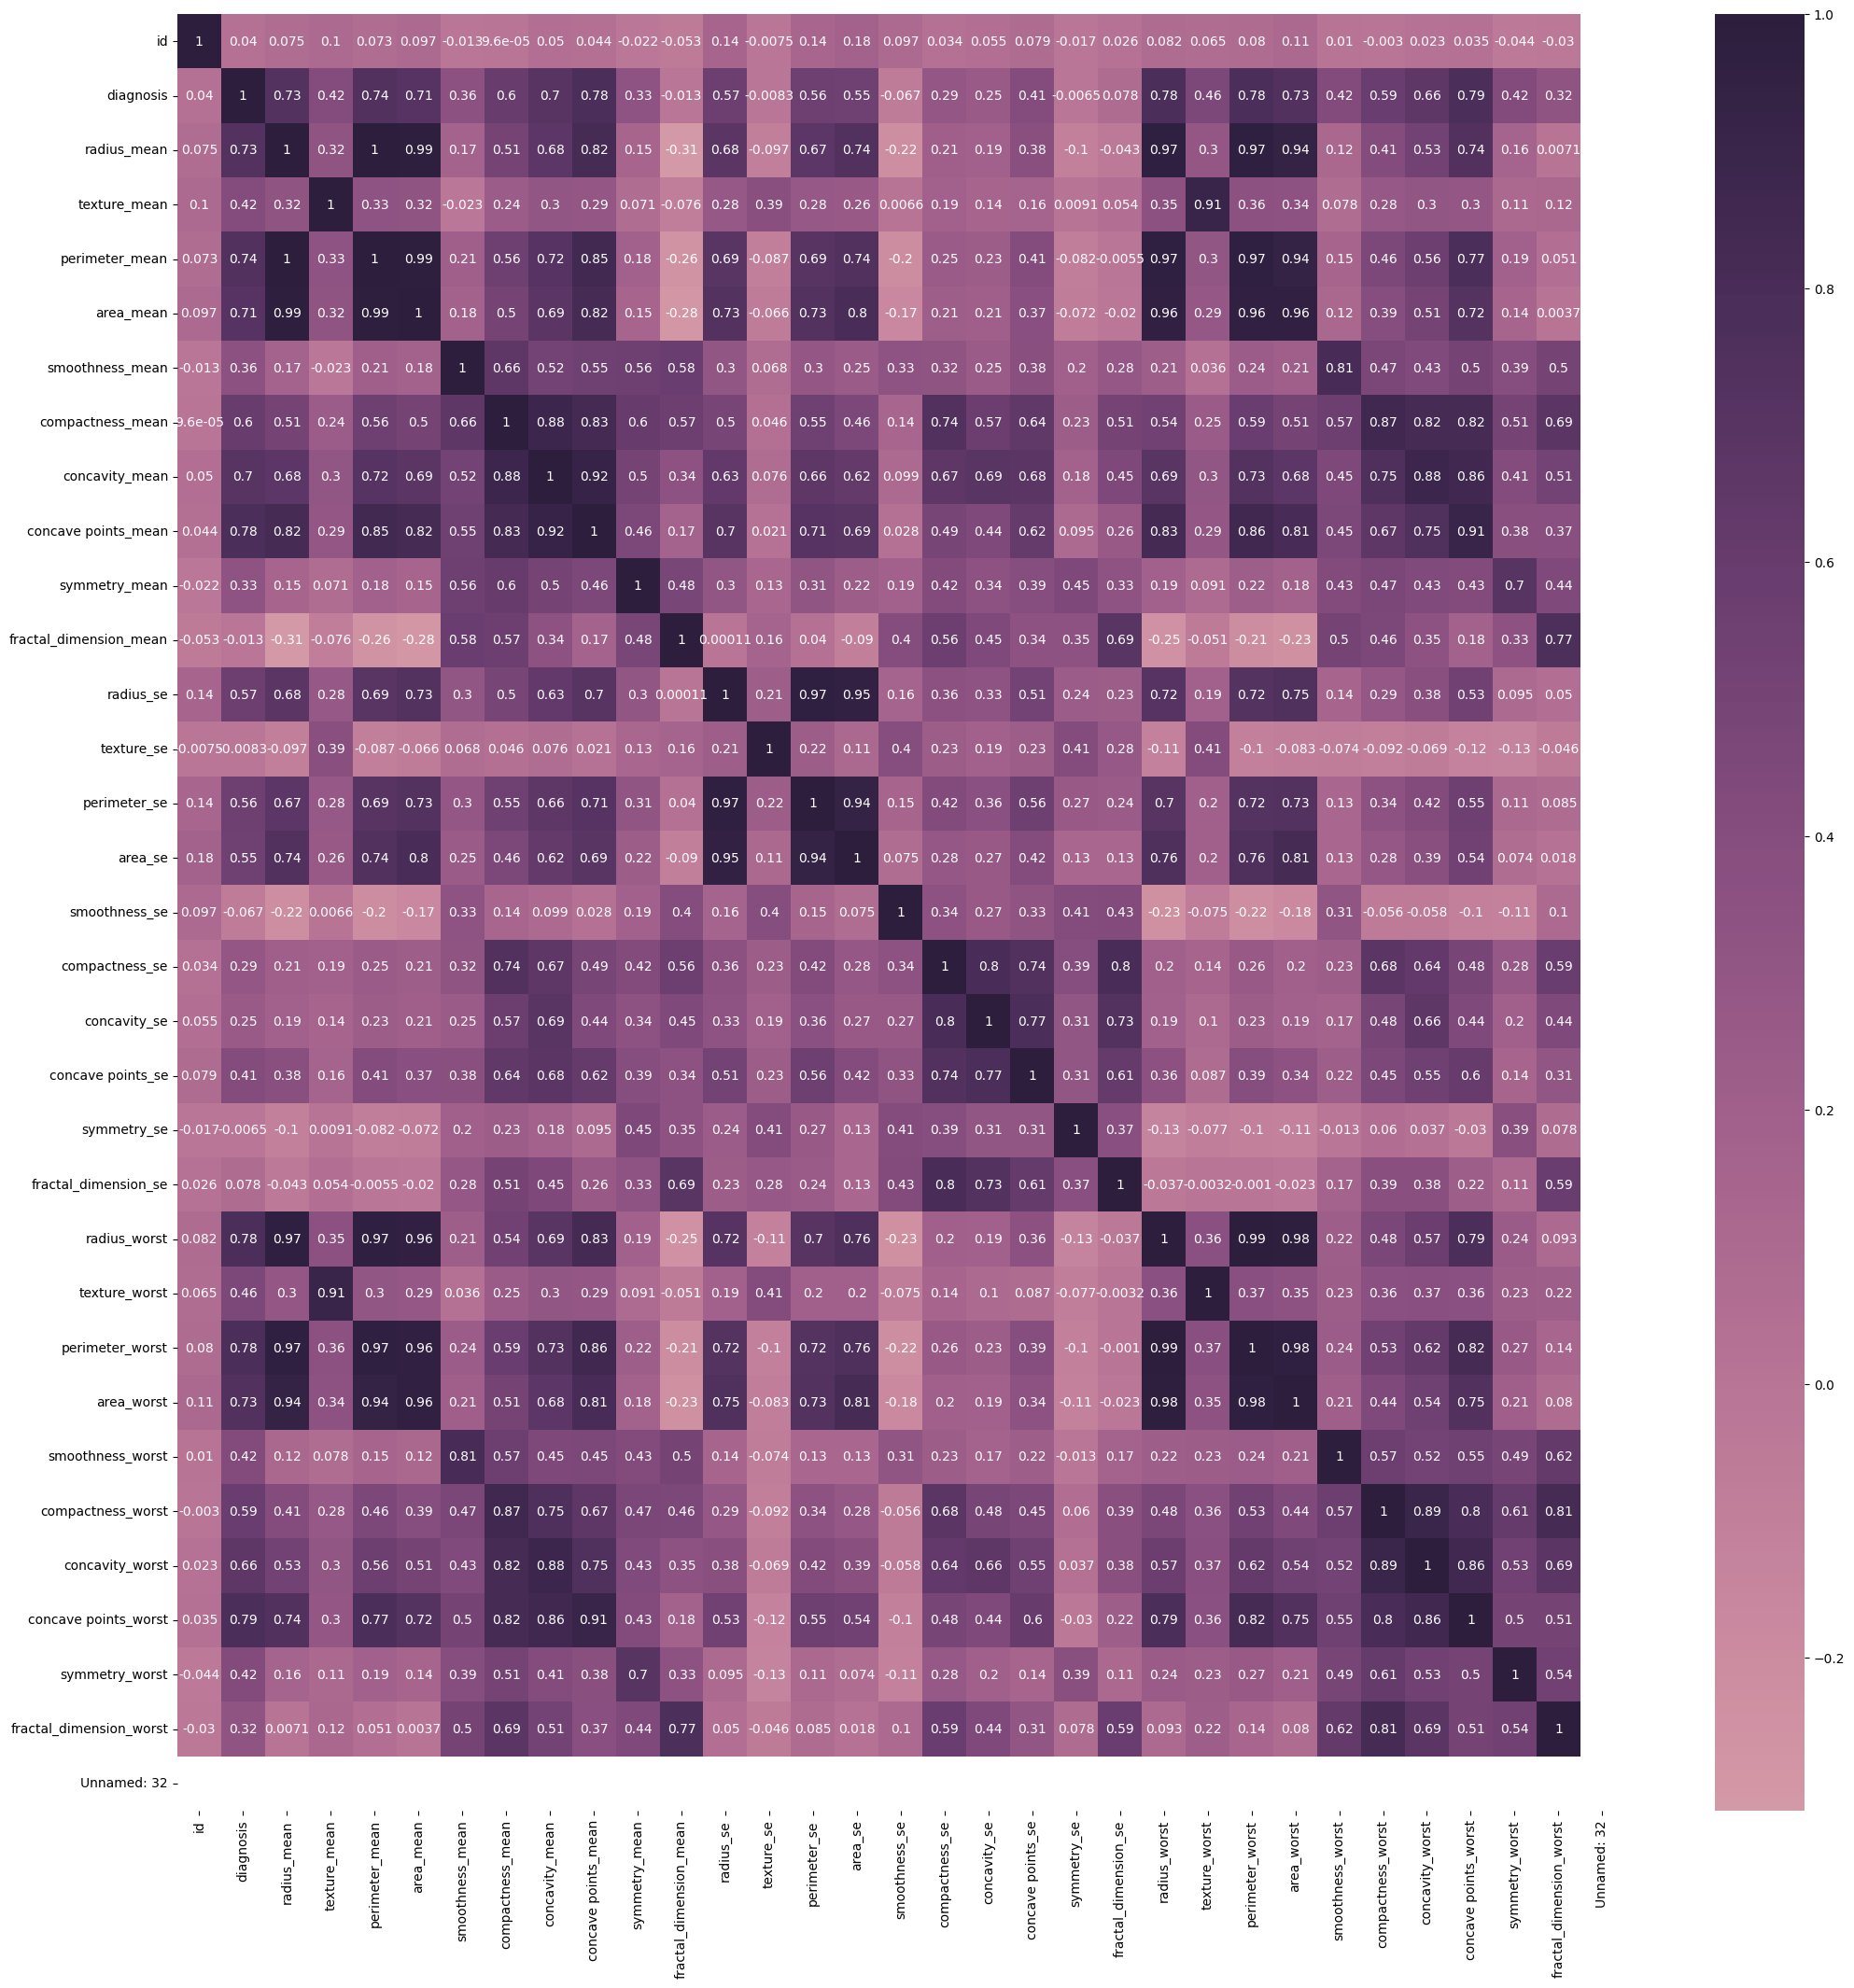

In [ ]:
# Heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(numeric_corr, annot=True, cmap=cmap, center=0)

plt.show()

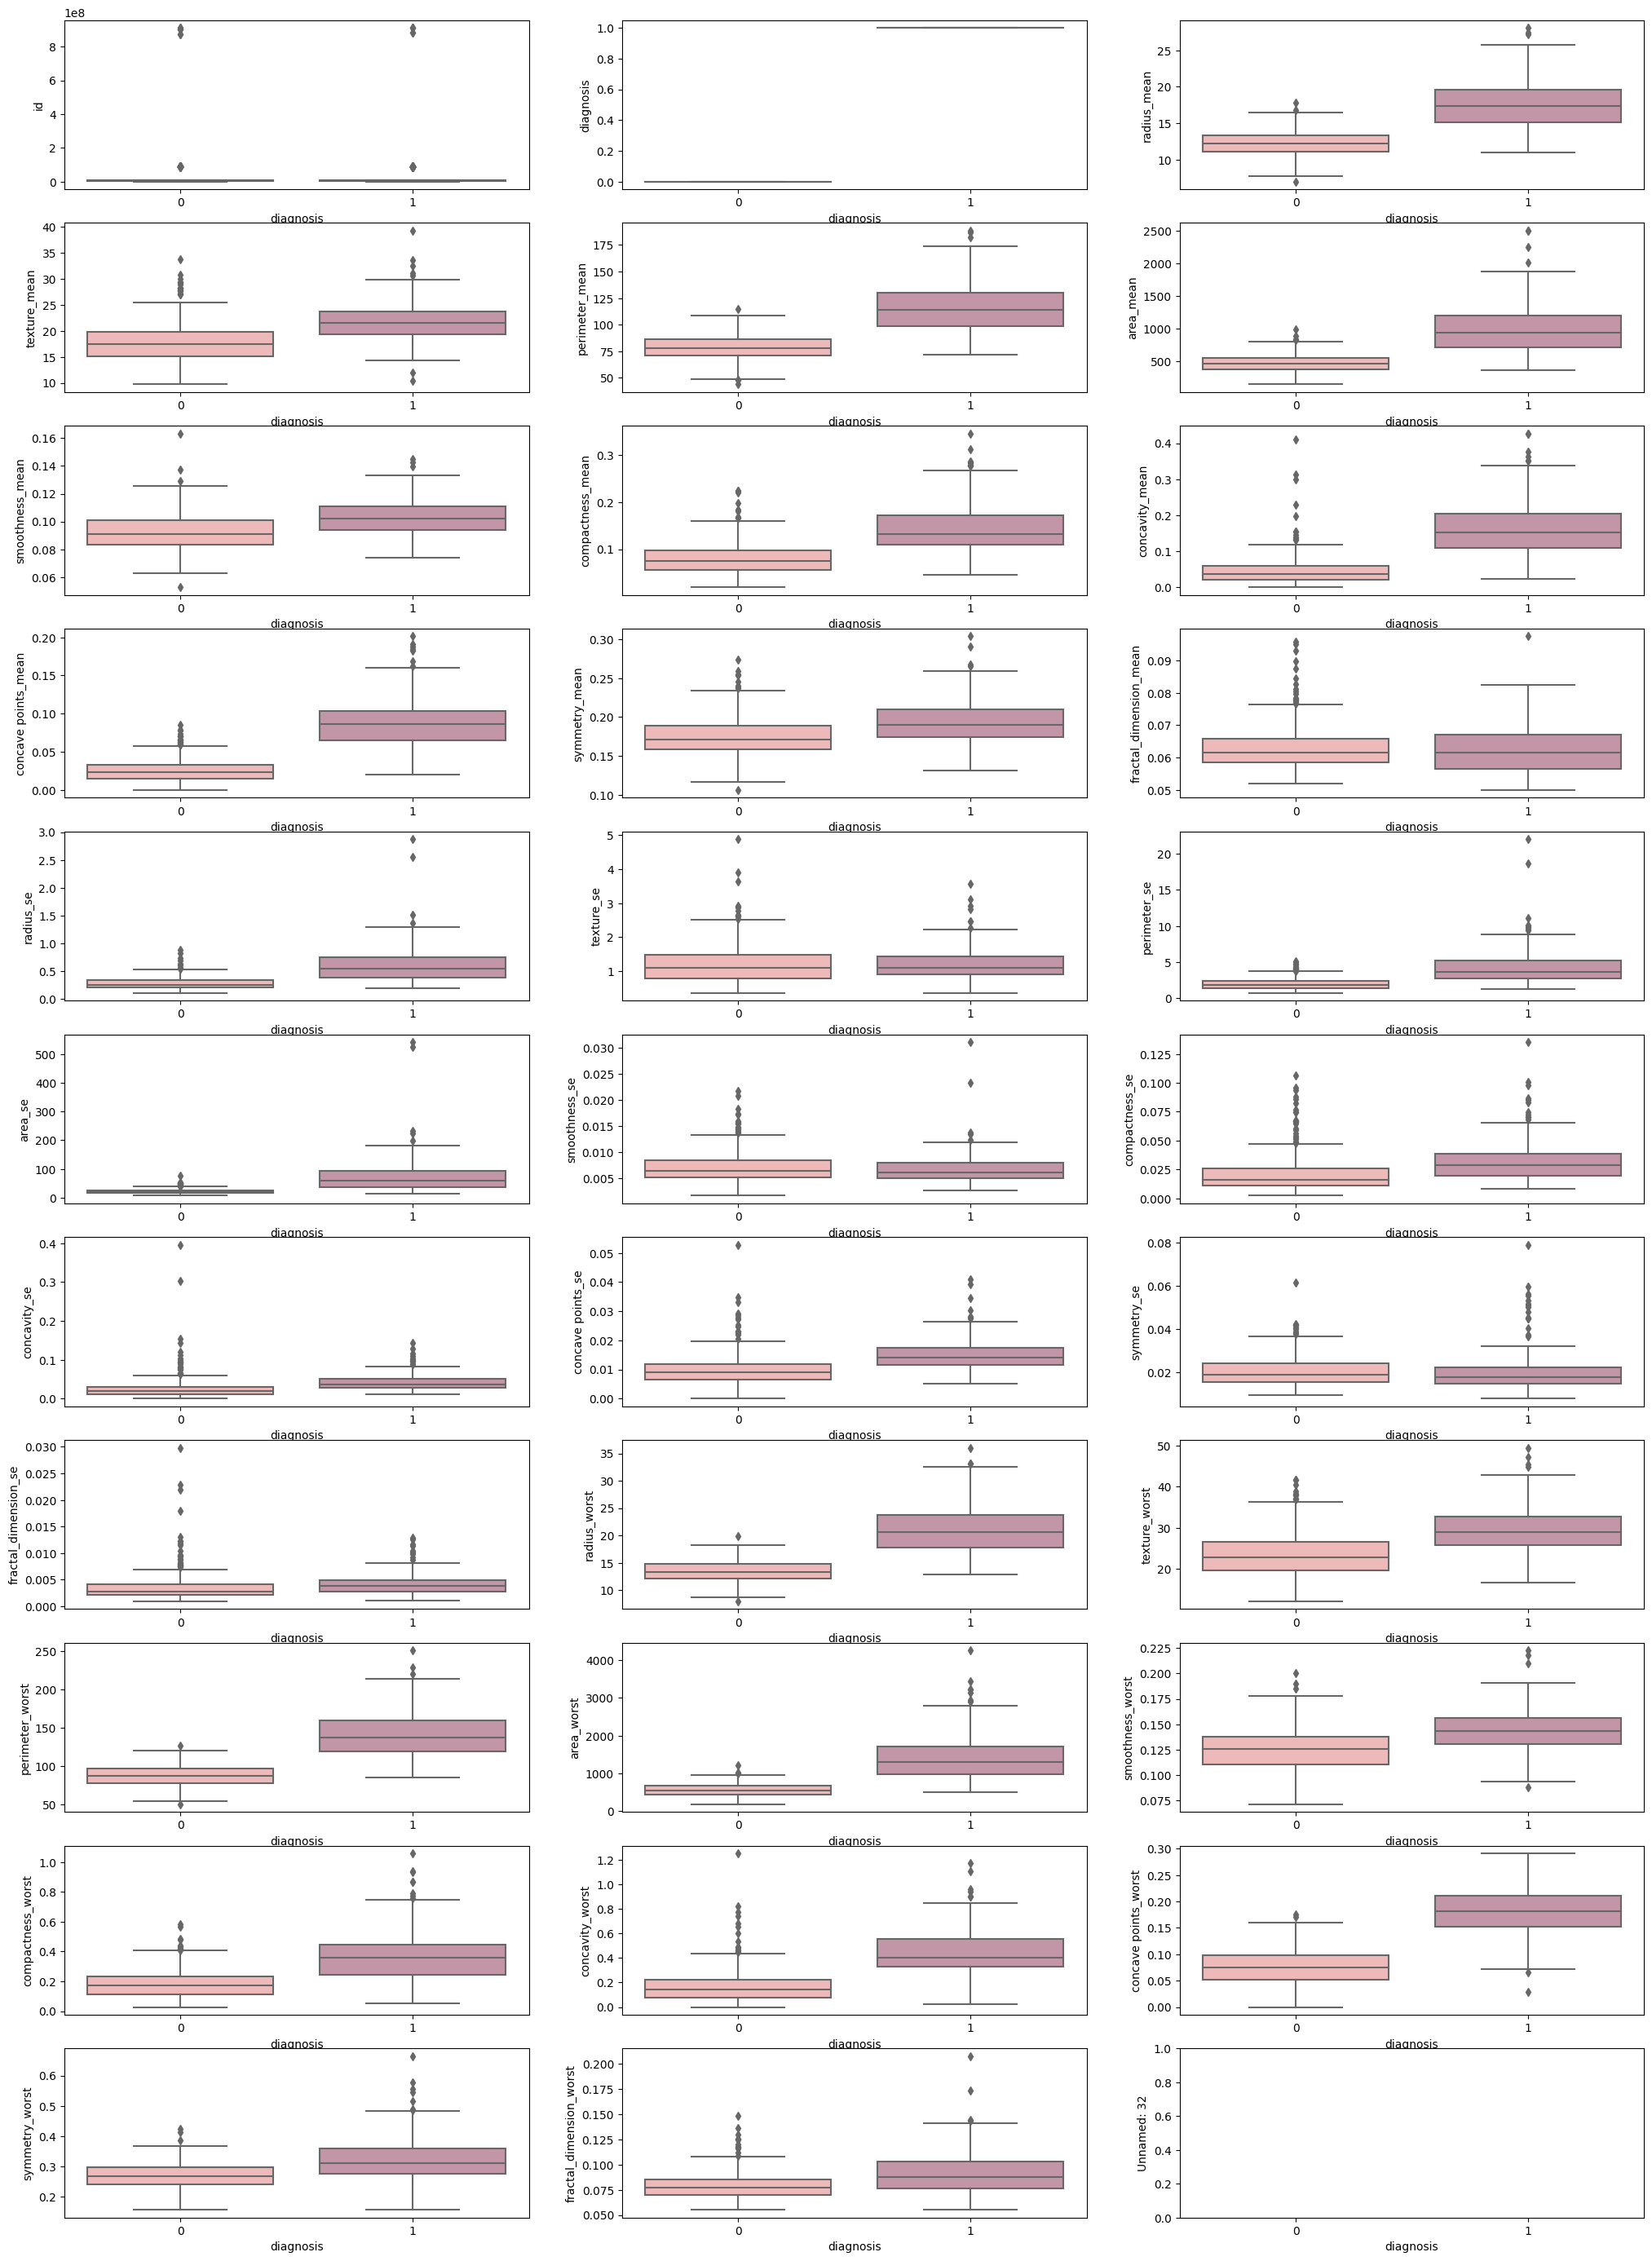

In [ ]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]

plt.figure(figsize=(25,35))
i=1
for cancerr in cancer.iloc[:,:].columns:
    plt.subplot(11,3,i)
    sns.boxplot(x='diagnosis',y=cancerr,data=cancer, palette=shades)
    i+=1

## **3.0 Data Cleaning**


### **3.1 Handling Missing Value**

The 'Unnamed: 32' column and 'id' column are drop.

In [ ]:
df = cancer.drop(labels="Unnamed: 32", axis=1)
df = df.drop(labels="id", axis=1)

df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### **3.2 Oversampling**

One of the steps of feature engineering is the oversampling process, because we have an unbalanced label the prediction will tend to have a bias towards the most frequent class, which clearly is not good, so SMOTE will be used **to have the same number of instances per class**.

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop(["diagnosis"], axis=1)
Y = df["diagnosis"]

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, Y)

In [ ]:
X_res.shape

(714, 30)

In [ ]:
y_res_table = y_res.value_counts()
y_res_table = y_res_table.sort_index(0)

<ipython-input-22-109f199201e1>:2: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only.
  y_res_table = y_res_table.sort_index(0)


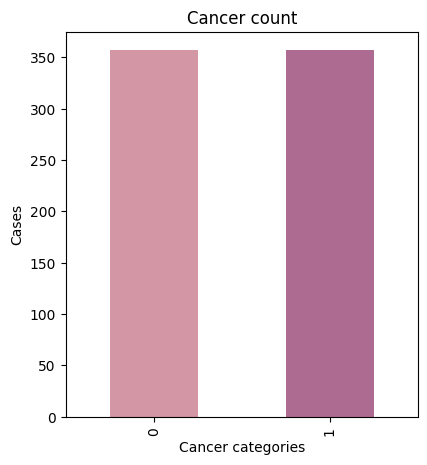

In [ ]:
# Bar chart
plt.subplot(121)
vis_y_res_fetal_health = y_res_table.plot(figsize=(10, 5), kind="bar", color=colors)
plt.title("Cancer count")
plt.xlabel("Cancer categories")
plt.ylabel("Cases")

plt.show()

### **3.3 Compare performance of models with and without oversampling**
**Cross validation**

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [ ]:
# Splitting the data

# With Oversampling
x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.3, random_state=25)
# Without Oversampling
x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size=0.3, random_state=25)


In [ ]:
x_train_res.shape, x_test_res.shape

((499, 30), (215, 30))

In [ ]:
y_train_res.shape, y_test_res.shape

((499,), (215,))

In [ ]:
x_tr.shape, x_te.shape

((398, 30), (171, 30))

In [ ]:
# Building pipelines of model for various classifiers
from sklearn.pipeline import Pipeline

pipeline_lg = Pipeline([('lg_classifier',LogisticRegression(random_state=42))])

#pipeline_svc = Pipeline([('svc_classifier',SVC())])
pipeline_gb = Pipeline([('gb_classifier',GradientBoostingClassifier())])

pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier(random_state=42))])

pipeline_knn = Pipeline([('knn_classifier',KNeighborsClassifier())])

# List of all the pipelines
pipelines = [pipeline_lg, pipeline_gb, pipeline_rf, pipeline_knn]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'GradientBoost', 2:'RandomForest', 3: 'KNN'}


In [ ]:
# Performance of model with scaling data and oversampling

# Fitting the pipelines
for pipe in pipelines:
    pipe.fit(x_train_res, y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cv_results_accuracy_scale = []
cv_results_accuracy_scale_mean = []

for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train_res, y_train_res, cv=12)
    cv_results_accuracy_scale.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

    cv_results_accuracy_scale_mean.append(cv_score.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: 0.951945 
GradientBoost: 0.969948 
RandomForest: 0.969948 
KNN: 0.937766 


In [ ]:
# Performance of model without scaling data and oversampling

# Fitting the pipelines
for pipe in pipelines:
    pipe.fit(x_tr, y_tr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cv_results_accuracy = []
cv_results_accuracy_mean = []

for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_tr,y_tr, cv=12)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

    cv_results_accuracy_mean.append(cv_score.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: 0.942291 
GradientBoost: 0.967395 
RandomForest: 0.957294 
KNN: 0.944667 


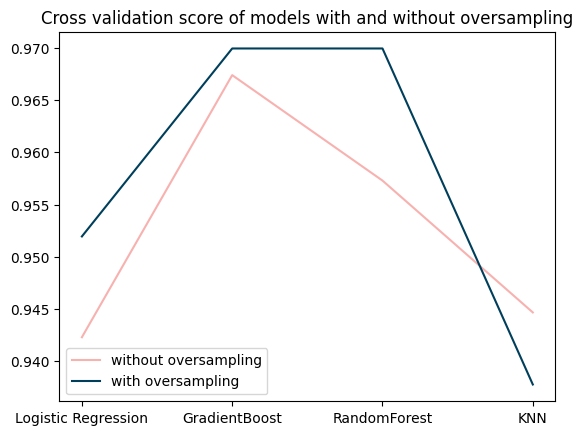

In [ ]:
models = ['Logistic Regression', 'GradientBoost', 'RandomForest', 'KNN']

plt.plot(models, cv_results_accuracy_mean, color="#f7b2b0", label="without oversampling")
plt.plot(models, cv_results_accuracy_scale_mean, color="#003f5c", label="with oversampling")

plt.title("Cross validation score of models with and without oversampling")

plt.legend()
plt.show()



Models with oversampling shows higher performance for Logistic Regression, Gradient Boost and Random Forest. However, KNN without oversampling shows higher performance than with oversampling.


The reason why KNN without oversampling shows higher performance than with oversampling, while the other models (Logistic Regression, Gradient Boost, and Random Forest) benefit from oversampling, can be attributed to the characteristics of the KNN algorithm and the effect of oversampling on the dataset.

K-Nearest Neighbors (KNN) is a distance-based algorithm that relies on the concept of proximity to make predictions. When dealing with imbalanced datasets (where one class is underrepresented), oversampling techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or random oversampling can help balance the class distribution by generating synthetic or replicated samples of the minority class.

Here are potential reasons why oversampling may not improve KNN's performance:

Nearest Neighbor Density: KNN makes predictions based on the nearest neighbors in the feature space. Oversampling techniques can increase the density of the minority class samples, making them more likely to be selected as nearest neighbors. This could introduce noise or bias into the decision-making process, leading to lower performance compared to the original class distribution.

Noise Amplification: Synthetic samples generated by oversampling techniques like SMOTE may introduce noise into the dataset. If the synthetic samples do not accurately represent the underlying patterns and characteristics of the minority class, they may introduce misleading information that affects the performance of the KNN algorithm.

Dataset Balance: KNN performs well when the classes are well-balanced, as it relies on the distribution of samples for determining the class of a given data point. Oversampling techniques alter the class distribution, potentially affecting the effectiveness of KNN's proximity-based decision-making process.

On the other hand, Logistic Regression, Gradient Boosting, and Random Forest are not as dependent on the distribution of the data and can benefit from oversampling in imbalanced datasets. Oversampling helps these models by providing more representative samples of the minority class, which can improve their ability to learn and generalize.

It's important to note that the performance of different algorithms and techniques can vary depending on the specific dataset and problem at hand. Therefore, it's recommended to experiment with various approaches, including oversampling, undersampling, or other balancing techniques, to determine the best approach for a given dataset and model.

### **3.4 Scaling the data**

Since the data obtained contains features of various dimensions and scales, scaling is required before creating a machine learning model. In this project, the techniques of features scaling used is **standardization**.

Standardization is a scaling technique that makes the data scale-free by converting the statistical distribution of the data into the below format:
1. mean - 0
2. standard deviation - 1

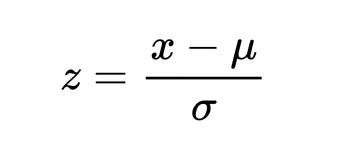

In [ ]:
# Scaling the data
s_scaler = StandardScaler()

# Both Scaling data and oversampling
X_res = s_scaler.fit_transform(X_res)

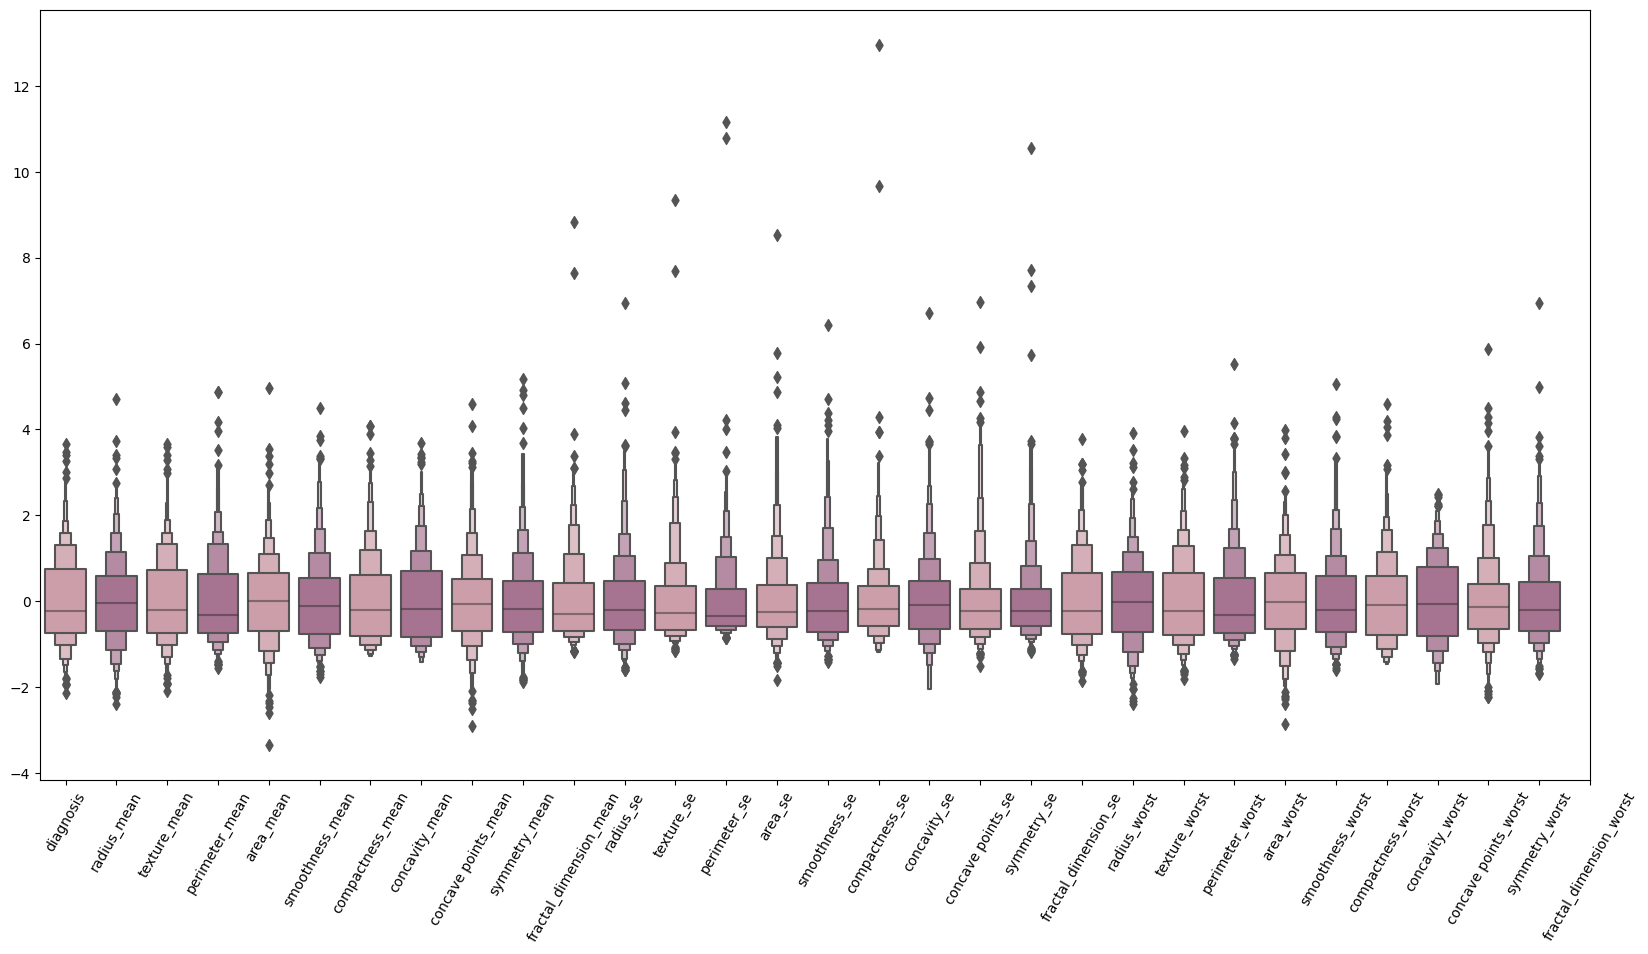

In [ ]:
feature_names = df.columns.values

#Plotting the scaled features using boxen plots
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_res,palette = colors)
plt.xticks(range(0, 31),feature_names, rotation=60)

plt.show()
print()

### **3.5 Compare performance of models with and without scaling data**
**Cross validation**

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [ ]:
# Only scaling data
X_sca = s_scaler.fit_transform(X)

In [ ]:
# Splitting the data

x_train_sca, x_test_sca, y_train_sca, y_test_sca = train_test_split(X_sca, Y, test_size=0.3, random_state=25)
x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size=0.3, random_state=25)


In [ ]:
x_train_sca.shape, x_test_sca.shape

((398, 30), (171, 30))

In [ ]:
y_train_sca.shape, y_test_sca.shape

((398,), (171,))

In [ ]:
x_tr.shape, x_te.shape

((398, 30), (171, 30))

In [ ]:
# Building pipelines of model for various classifiers
from sklearn.pipeline import Pipeline

pipeline_lg = Pipeline([('lg_classifier',LogisticRegression(random_state=42))])

#pipeline_svc = Pipeline([('svc_classifier',SVC())])
pipeline_gb = Pipeline([('gb_classifier',GradientBoostingClassifier())])

pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier(random_state=42))])

pipeline_knn = Pipeline([('knn_classifier',KNeighborsClassifier())])

# List of all the pipelines
pipelines = [pipeline_lg, pipeline_gb, pipeline_rf, pipeline_knn]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'GradientBoost', 2:'RandomForest', 3: 'KNN'}


In [ ]:
# Performance of model with scaling data and oversampling

# Fitting the pipelines
for pipe in pipelines:
    pipe.fit(x_train_sca, y_train_sca)

In [ ]:
cv_results_accuracy_scale = []
cv_results_accuracy_scale_mean = []

for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train_sca, y_train_sca, cv=12)
    cv_results_accuracy_scale.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

    cv_results_accuracy_scale_mean.append(cv_score.mean())

Logistic Regression: 0.977496 
GradientBoost: 0.964869 
RandomForest: 0.957294 
KNN: 0.964869 


In [ ]:
# Performance of model without scaling data and oversampling

# Fitting the pipelines
for pipe in pipelines:
    pipe.fit(x_tr, y_tr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cv_results_accuracy = []
cv_results_accuracy_mean = []

for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_tr,y_tr, cv=12)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

    cv_results_accuracy_mean.append(cv_score.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: 0.942291 
GradientBoost: 0.962344 
RandomForest: 0.957294 
KNN: 0.944667 


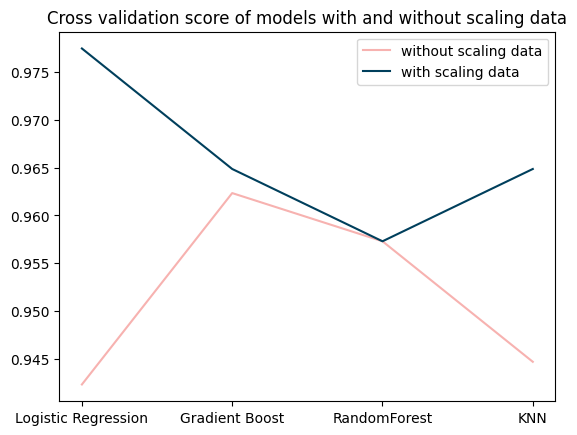

In [ ]:
models = ['Logistic Regression', 'Gradient Boost', 'RandomForest', 'KNN']

plt.plot(models, cv_results_accuracy_mean, color="#f7b2b0", label="without scaling data")
plt.plot(models, cv_results_accuracy_scale_mean, color="#003f5c", label="with scaling data")

plt.title("Cross validation score of models with and without scaling data")

plt.legend()
plt.show()



Logistic Regression, Gradient Boost, and KNN shows higher performance after scaling data. Random Forest shows the same performance after scaling data.

Logistic Regression: Logistic Regression is sensitive to the scale of input features. Scaling the data helps to bring the features to a similar scale, preventing one feature from dominating the others. By scaling the data, the algorithm can converge faster and make more accurate predictions.

Gradient Boosting: Gradient Boosting algorithms, such as Gradient Boosted Trees or XGBoost, are generally not sensitive to feature scales. They work by combining weak models (typically decision trees) iteratively. Since decision trees make splits based on feature thresholds, the relative scales of features do not impact their performance significantly. Thus, scaling the data might not have a substantial effect on Gradient Boosting algorithms.

K-Nearest Neighbors (KNN): KNN is a distance-based algorithm that calculates the distance between data points to make predictions. Scaling the data ensures that features with larger scales do not dominate the distance calculations. By scaling the data, the algorithm can achieve a more balanced influence of each feature, leading to better performance.

Random Forest: Random Forest is an ensemble algorithm that combines multiple decision trees. Similar to Gradient Boosting, decision trees within Random Forest are not highly sensitive to feature scales. Decision tree splits are based on comparing feature values, rather than their absolute scales. Therefore, scaling the data might not have a significant impact on the performance of Random Forest.

# 4.0 Model Training

Machine Learning Model
1. KNN
2. Random Forest
3. SVM
4. Logistic Regression

In [ ]:
# method for Evaluation of models

def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred,average = 'macro')
    rec = metrics.recall_score(y_test, y_pred,average = 'macro')
    f1 = metrics.f1_score(y_test, y_pred,average = 'macro')
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 'cm': cm}

In [ ]:
# Function to the results after grid search
def Searcher(estimator, param_grid, train_x, train_y, test_x, test_y,label=None,cv=10):
  clf = GridSearchCV(
                estimator=estimator,
                param_grid=param_grid,
                scoring=None,
                n_jobs=-1,
                cv=cv, #Cross-validation at 10 replicates
                verbose=0,
                return_train_score=True
  )

  # Fit the model
  print('Start model fitting for', label)
  clf.fit(X=train_x, y=train_y)

  #Testing the model
  #Defining prints for accuracy metrics of grid
  print("**Grid search results of", label,"**")
  print("The best parameters are:", clf.best_params_)
  print("Best training accuracy:\t", clf.best_score_)
  print('Classification Report:')
  print(classification_report(y_true=test_y, y_pred=clf.predict(test_x)))

  return clf;

## K-nearest neighbors (KNN)

In [ ]:
# Classifier Algorithm 1: KNN
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print('Baseline K-Nearest Neighbors: ',knn.score(x_test,y_test))

Baseline K-Nearest Neighbors:  0.9534883720930233


In [ ]:
knn_pred = knn.predict(x_test)

print("\nBaseline Accuracy Score: %f"%(accuracy_score(y_test, knn_pred)*100))


Baseline Accuracy Score: 95.348837


In [ ]:
print("Classification Report")
print(classification_report(y_test, knn_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       114
           1       0.94      0.96      0.95       101

    accuracy                           0.95       215
   macro avg       0.95      0.95      0.95       215
weighted avg       0.95      0.95      0.95       215



In [ ]:
print("Confusion Matrix:")
knn_cfmatrix = confusion_matrix(y_test, knn_pred)
print(knn_cfmatrix)

Confusion Matrix:
[[108   6]
 [  4  97]]


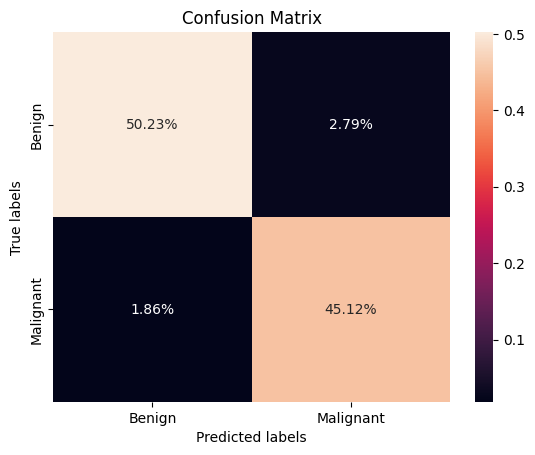

In [ ]:
ax = plt.subplot()
sns.heatmap(knn_cfmatrix/np.sum(knn_cfmatrix), fmt='.2%', annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Benign", "Malignant"])
ax.yaxis.set_ticklabels(["Benign", "Malignant"])

plt.show()

In [ ]:
# to show the accuracy for no_neighbours from 1 until 8
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

In [ ]:
for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(x_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

In [ ]:
train_accuracy

array([1.        , 0.98597194, 0.9759519 , 0.98597194, 0.97995992,
       0.97995992, 0.9739479 , 0.97194389])

In [ ]:
test_accuracy

array([0.94883721, 0.95348837, 0.94418605, 0.95813953, 0.95348837,
       0.95348837, 0.94418605, 0.94883721])

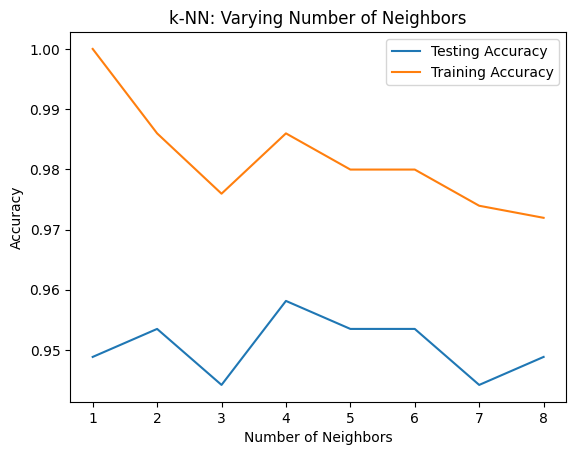

In [ ]:
# Visualization of k values vs accuracy
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Grid Search

In [ ]:
#Grid Search KNN Parameters
knn_param = {
    "n_neighbors":[4, 6, 8, 10, 20],
    "weights":['uniform','distance'],
    "algorithm":['ball_tree', 'kd_tree', 'brute'],
    "p":[1,2]}

#Grid Search KNN
knn_grid = Searcher(KNeighborsClassifier(), knn_param, x_train, y_train, x_test, y_test,label='KNN Grid')

Start model fitting for KNN Grid
**Grid search results of KNN Grid **
The best parameters are: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Best training accuracy:	 0.9759591836734692
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       114
           1       0.94      0.94      0.94       101

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215



Based on the results we get, knn with parameters {'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'} will give the best accuracy. Hence, we can test with the best paramters now.

In [ ]:
knn_best = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6, p=1, weights='distance')
knn_best.fit(x_train, y_train)

print(knn_best.score(x_test, y_test))

0.958139534883721


In [ ]:
knn_best_pred = knn_best.predict(x_test)

print("Accuracy Score with Best Parameters: %f"%(accuracy_score(y_test, knn_best_pred)*100))

Accuracy Score with Best Parameters: 95.813953


In [ ]:
print("Confusion Matrix:")
knn_best_cfmatrix = confusion_matrix(y_test, knn_best_pred)
print(knn_best_cfmatrix)

Confusion Matrix:
[[109   5]
 [  4  97]]


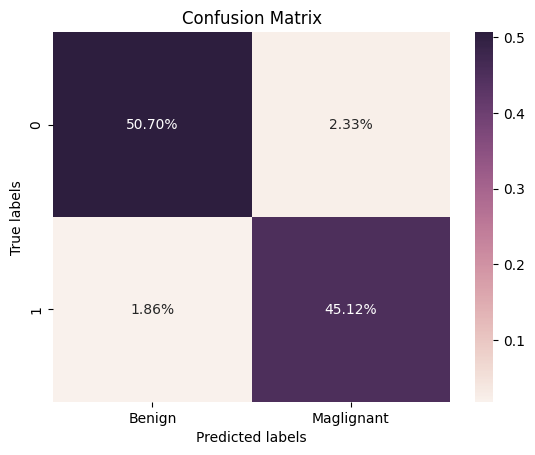

In [ ]:
ax = plt.subplot()
sns.heatmap(knn_best_cfmatrix/np.sum(knn_best_cfmatrix), fmt='.2%', annot=True, ax = ax, cmap = cmap);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Benign", "Maglignant"])
ax.yaxis.set_ticklabels(["Benign", "Maglignant"])

plt.show()

In [ ]:
# Evaluation of KNN model
knn_eval = evaluate_model(knn_best, x_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.958139534883721
Precision: 0.9577910810341835
Recall: 0.9582681952405767
F1 Score: 0.9580087237690154
Cohens Kappa Score: 0.9160192699969619
Confusion Matrix:
 [[109   5]
 [  4  97]]


##Random Forest

In [ ]:
# Classifier Algorithm 1: RFC
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train,y_train)

print('Baseline Random Forest: ',rfc.score(x_test, y_test))

Baseline Random Forest:  0.9441860465116279


In [ ]:
rfc_pred = rfc.predict(x_test)

print("Baseline Accuracy Score: %f"%(accuracy_score(y_test, rfc_pred)*100))

Baseline Accuracy Score: 94.418605


In [ ]:
print("Classification Report")
print(classification_report(y_test, rfc_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       114
           1       0.93      0.95      0.94       101

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215



In [ ]:
print("Confusion Matrix:")
rfc_cfmatrix = confusion_matrix(y_test, rfc_pred)
print(rfc_cfmatrix)

Confusion Matrix:
[[107   7]
 [  5  96]]


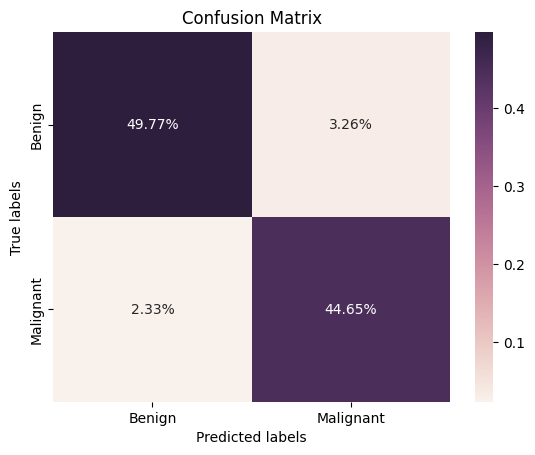

In [ ]:
ax = plt.subplot()
sns.heatmap(rfc_cfmatrix/np.sum(rfc_cfmatrix), fmt='.2%', annot=True, ax = ax, cmap = cmap);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Benign", "Malignant"])
ax.yaxis.set_ticklabels(["Benign", "Malignant"])

plt.show()

####Grid Search (Random Forest)

Reference link: https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

In [ ]:
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "criterion" :["gini", "entropy"],
    "max_depth" : [3,5,7,8,9]
}

GS_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
GS_rfc.fit(x_train, y_train)

In [ ]:
GS_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}

In [ ]:
rfc_best = RandomForestClassifier(random_state = 42, n_estimators = 200, max_depth = 5, criterion = 'entropy')
rfc_best.fit(x_train, y_train)

print(rfc_best.score(x_test, y_test))

0.9534883720930233


In [ ]:
rfc_best = RandomForestClassifier(random_state = 42, n_estimators = 500, max_depth = 8, criterion = 'gini')
rfc_best.fit(x_train, y_train)

print(rfc_best.score(x_test, y_test))

0.9534883720930233


In [ ]:
rfc_best_pred = rfc_best.predict(x_test)

print("Accuracy Score with Best Parameters: %f"%(accuracy_score(y_test, rfc_best_pred)*100))

Accuracy Score with Best Parameters: 95.348837


In [ ]:
# Evalution of Random Forest model
rfc_eval = evaluate_model(rfc_best, x_test, y_test)

# Print result
print('Accuracy:', rfc_eval['acc'])
print('Precision:', rfc_eval['prec'])
print('Recall:', rfc_eval['rec'])
print('F1 Score:', rfc_eval['f1'])
print('Cohens Kappa Score:', rfc_eval['kappa'])
print('Confusion Matrix:\n', rfc_eval['cm'])

Accuracy: 0.9534883720930233
Precision: 0.9533177001910718
Recall: 0.9533177001910718
F1 Score: 0.9533177001910718
Cohens Kappa Score: 0.9066354003821435
Confusion Matrix:
 [[109   5]
 [  5  96]]


##Gradient Boost

In [ ]:
# Classifier Algorithm 3: Gradient Boost
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

gbc.score(x_test, y_test)

0.958139534883721

In [ ]:
gbc_pred = gbc.predict(x_test)
print(gbc_pred)

print("\nBaseline Accuracy Score: %f"%(accuracy_score(y_test, gbc_pred)*100))

[0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0
 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0
 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0
 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0]

Baseline Accuracy Score: 95.813953


In [ ]:
print("Classification Report")
print(classification_report(y_test, gbc_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       114
           1       0.96      0.95      0.96       101

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



In [ ]:
print("Confusion Matrix:")
gbc_cfmatrix = confusion_matrix(y_test, gbc_pred)
print(gbc_cfmatrix)

Confusion Matrix:
[[110   4]
 [  5  96]]


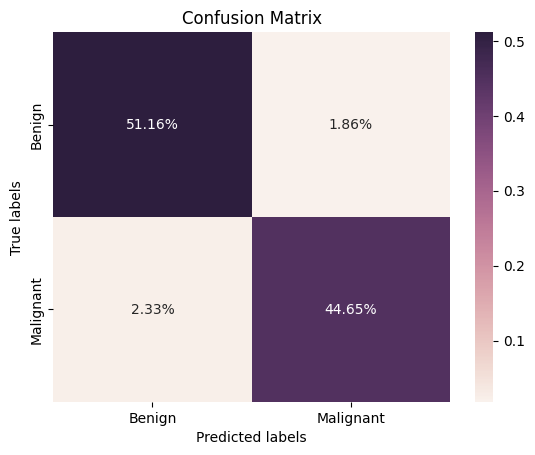

In [ ]:
ax = plt.subplot()
sns.heatmap(gbc_cfmatrix/np.sum(gbc_cfmatrix), fmt='.2%', annot=True, ax = ax, cmap = cmap);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Benign", "Malignant"])
ax.yaxis.set_ticklabels(["Benign", "Malignant"])

plt.show()

####Grid Search

In [ ]:
#Grid Search GBC Parameters
gbc_param = {"loss": ["log_loss"],
              "learning_rate": [0.05, 0.1],
              "max_depth": [3, 5, 8]
            }

#Grid Search GBC
gbc_grid = Searcher(GradientBoostingClassifier(), gbc_param, x_train, y_train, x_test, y_test, label='GBC Grid')

Start model fitting for GBC Grid
**Grid search results of GBC Grid **
The best parameters are: {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3}
Best training accuracy:	 0.9718775510204081
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       114
           1       0.95      0.95      0.95       101

    accuracy                           0.95       215
   macro avg       0.95      0.95      0.95       215
weighted avg       0.95      0.95      0.95       215



In [ ]:
gbc_best = GradientBoostingClassifier(learning_rate = 0.1, loss = "log_loss", max_depth = 3)
gbc_best.fit(x_train, y_train)

print(gbc_best.score(x_test, y_test))

In [ ]:
gbc_best_pred = gbc_best.predict(x_test)

print("Accuracy Score with Best Parameters: %f"%(accuracy_score(y_test, gbc_best_pred)*100))

In [ ]:
print("Confusion Matrix:")
gbc_best_cfmatrix = confusion_matrix(y_test, gbc_best_pred)
print(gbc_best_cfmatrix)

In [ ]:
ax = plt.subplot()
sns.heatmap(gbc_best_cfmatrix/np.sum(gbc_best_cfmatrix), fmt='.2%', annot=True, ax = ax, cmap = cmap);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Benign", "Malignant"])

plt.show()

In [ ]:
# Evaluation of Gradient Boost model
gbc_eval = evaluate_model(gbc_best, x_test, y_test)

# Print result
print('Accuracy:', gbc_eval['acc'])
print('Precision:', gbc_eval['prec'])
print('Recall:', gbc_eval['rec'])
print('F1 Score:', gbc_eval['f1'])
print('Cohens Kappa Score:', gbc_eval['kappa'])
print('Confusion Matrix:\n', gbc_eval['cm'])

##Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train,y_train)
print('Baseline Logistic Regression: ', lr.score(x_test, y_test))

In [ ]:
lr_pred = lr.predict(x_test)
print("Baseline accuracy score:%f"%(accuracy_score(y_test, lr_pred)*100))

In [ ]:
print("Classification Report")
print(classification_report(y_test, lr_pred))

In [ ]:
print("Confusion Matrix:")
lr_cfmatrix = confusion_matrix(y_test, lr_pred)
print(lr_cfmatrix)

Confusion Matrix:
[[111   3]
 [  5  96]]


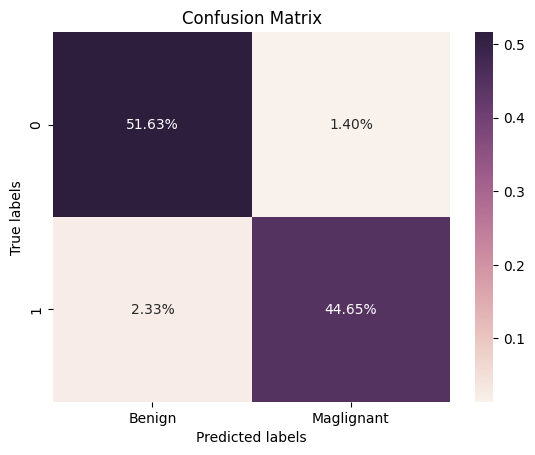

In [ ]:
ax = plt.subplot()
sns.heatmap(lr_cfmatrix/np.sum(lr_cfmatrix), fmt='.2%', annot=True, ax = ax, cmap = cmap);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Benign", "Maglignant"])

plt.show()

### Grid Search

In [ ]:
#Grid Search LR Parameters
lr_param = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [100, 1000, 2500, 5000]
}

#Grid Search LR
lr_grid  = Searcher(LogisticRegression(random_state=42), lr_param, x_train, y_train, x_test, y_test, label='LR Grid')


Start model fitting for LR Grid


Start model fitting for LR Grid

**Grid search results of LR Grid**

The best parameters are: {'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Best training accuracy:	 0.9800000000000001

Classification Report:


```
                precision    recall  f1-score   support

           0       0.96      0.97      0.97       114
           1       0.97      0.95      0.96       101

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215
```



In [ ]:
lr_best = LogisticRegression(random_state=42, C=0.23357214690901212, max_iter=100, penalty='l2', solver='lbfgs')
lr_best.fit(x_train, y_train)
print(lr_best.get_params())
print(lr_best.score(x_test, y_test))

The accuracy is not increased after grid search

In [ ]:
lr_best_pred = lr_best.predict(x_test)

print("Accuracy Score with Best Parameters: %f"%(accuracy_score(y_test, lr_best_pred)*100))

In [ ]:
print("Confusion Matrix:")
lr_best_cfmatrix = confusion_matrix(y_test, lr_best_pred)
print(lr_best_cfmatrix)

In [ ]:
ax = plt.subplot()
sns.heatmap(lr_best_cfmatrix/np.sum(lr_best_cfmatrix), fmt='.2%', annot=True, ax = ax, cmap = cmap);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Benign", "Maglignant"])
ax.yaxis.set_ticklabels(["Benign", "Maglignant"])

plt.show()

In [ ]:
# Evalution of Logistic Regression model
lr_eval = evaluate_model(lr_best, x_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Confusion Matrix:\n', lr_eval['cm'])

## Comparison of Performance between Classification Algorithms

In [ ]:
# Intitialize figure with one plot
colorss = ["#f0d9d2", "#d396a5", "#ae6b91", "#2d1e3e"]

fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(7)
fig.set_facecolor('white')

## set bar size
barWidth = 0.2
bas_score = [(accuracy_score(y_test, knn_pred)*100), (accuracy_score(y_test, rfc_pred)*100),
             (accuracy_score(y_test, gbc_pred)*100), (accuracy_score(y_test, lr_pred)*100)]
best_score = [(accuracy_score(y_test, knn_best_pred)*100), (accuracy_score(y_test, rfc_best_pred)*100),
              (accuracy_score(y_test, gbc_best_pred)*100), (accuracy_score(y_test, lr_best_pred)*100)]

## Set position of bar on X axis
r1 = np.arange(len(bas_score))
r1 = [x + barWidth for x in r1]
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, bas_score, width=barWidth, edgecolor='white', label='Baseline', color=colorss[0])
ax1.bar(r2, best_score, width=barWidth, edgecolor='white', label='Best Parameters', color=colorss[1])

## Configure x and y axis
ax1.set_xlabel('Models', fontweight='bold')
labels = ['KNN', 'Logistic Regression', 'Gradient Boost', 'Random Forest']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(bas_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Accuracy Score', fontweight='bold')
ax1.set_ylim(90, 100)

## Create legend & title
ax1.set_title('Accuracy Score', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()

**`Random Forest The Best Parameter`**